In [22]:
from math import sin, cos, sqrt, atan2, radians

# Define the Earth's radius
earth_radius = 6371

# Convert coordinates to radians
lat1 = radians(-14.45089438)
lon1 = radians(-34.7247968)
lat2 = radians(-14.4515707)
lon2 = radians(-34.72716128)

# Calculate the difference in latitude and longitude
dlat = lat2 - lat1
dlon = lon2 - lon1

# Calculate the Haversine formula
a = sin(dlat / 2) * sin(dlat / 2) + cos(lat1) * cos(lat2) * sin(dlon / 2) * sin(dlon / 2)
c = 2 * atan2(sqrt(a), sqrt(1 - a))

# Calculate the distance in kilometers
distance = earth_radius * c

# Print the distance
print(distance)

0.26547406161259285


In [3]:
df = pd.read_parquet('tpw_2024-01-12 00:00:00_to_2024-01-12 00:00:00.parquet')
df.tail(50)

,timestamp,station_id,TPW
645,202401122130,A636,NaN
646,202401122130,A621,NaN
647,202401122130,A602,NaN
648,202401122130,A652,NaN
649,202401122130,A627,NaN
650,202401122140,A636,NaN
651,202401122140,A621,NaN
652,202401122140,A602,NaN
653,202401122140,A652,NaN
654,202401122140,A627,NaN


In [7]:
df.shape

(695, 3)

In [4]:
# Counting NaN values in column
nan_count = df['TPW'].isna().sum()
print(nan_count)

692


In [6]:
df.station_id.unique()

array(['A636', 'A621', 'A602', 'A652', 'A627'], dtype=object)

In [8]:
import pandas as pd
df = pd.read_parquet('DSIF_CAPE_2024-01-12 00:00:00_to_2024-01-12 00:00:00.parquet')
df.tail(50)

,timestamp,station_id,tpw_value
645,202401122130,A636,NaN
646,202401122130,A621,NaN
647,202401122130,A602,NaN
648,202401122130,A652,NaN
649,202401122130,A627,NaN
650,202401122140,A636,NaN
651,202401122140,A621,NaN
652,202401122140,A602,NaN
653,202401122140,A652,NaN
654,202401122140,A627,NaN


In [9]:
# Counting NaN values in column
nan_count = df['TT'].isna().sum()
print(nan_count)

KeyError: 'TT'

# GOES-R Satellite Latitude and Longitude Grid Projection Algorithm

source: https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm

In [29]:
from netCDF4 import Dataset
import os

full_direc = os.listdir('../data/goes16/temp')
nc_files = [ii for ii in full_direc if ii.endswith('.nc')]
nc_indx = 0 
g16_data_file = '../data/goes16/temp/' + nc_files[nc_indx] # select .nc file
print(nc_files[nc_indx]) # print file name

# designate dataset
g16nc = Dataset(g16_data_file, 'r')

# GOES-R projection info
proj_info = g16nc.variables['goes_imager_projection']

print(proj_info)

OR_ABI-L2-DSIF-M6_G16_s20240690830206_e20240690839514_c20240690841122.nc
<class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    perspective_point_height: 35786023.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


In [30]:
def calc_latlon(ds):
    # The math for this function was taken from 
    # https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm
    x = ds.x
    y = ds.y
    goes_imager_projection = ds.goes_imager_projection
    
    x,y = np.meshgrid(x,y)
    
    r_eq = goes_imager_projection.attrs["semi_major_axis"]
    r_pol = goes_imager_projection.attrs["semi_minor_axis"]
    l_0 = goes_imager_projection.attrs["longitude_of_projection_origin"] * (np.pi/180)
    h_sat = goes_imager_projection.attrs["perspective_point_height"]
    H = r_eq + h_sat
    
    a = np.sin(x)**2 + (np.cos(x)**2 * (np.cos(y)**2 + (r_eq**2 / r_pol**2) * np.sin(y)**2))
    b = -2 * H * np.cos(x) * np.cos(y)
    c = H**2 - r_eq**2
    
    r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    
    s_x = r_s * np.cos(x) * np.cos(y)
    s_y = -r_s * np.sin(x)
    s_z = r_s * np.cos(x) * np.sin(y)
    
    lat = np.arctan((r_eq**2 / r_pol**2) * (s_z / np.sqrt((H-s_x)**2 +s_y**2))) * (180/np.pi)
    lon = (l_0 - np.arctan(s_y / (H-s_x))) * (180/np.pi)
    
    ds = ds.assign_coords({
        "lat":(["y","x"],lat),
        "lon":(["y","x"],lon)
    })
    ds.lat.attrs["units"] = "degrees_north"
    ds.lon.attrs["units"] = "degrees_east"
    return ds

In [31]:
import xarray as xr 
import s3fs
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature 

# fs = s3fs.S3FileSystem(anon=True)
# f = fs.open("s3://noaa-goes17/ABI-L2-MCMIPC/2021/050/18/OR_ABI-L2-MCMIPC-M6_G17_s20210501801176_e20210501803549_c20210501804089.nc")
# ds = xr.open_dataset(f) 

ds = xr.open_dataset('../data/goes16/temp/OR_ABI-L2-DSIF-M6_G16_s20240690000204_e20240690009512_c20240690011060.nc')

g16nc_as_latlon = calc_latlon(ds)

/tmp/ipykernel_7022/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


In [32]:
def get_xy_from_latlon(ds, lats, lons):
    lat1, lat2 = lats
    lon1, lon2 = lons

    lat = ds.lat.data
    lon = ds.lon.data
    
    x = ds.x.data
    y = ds.y.data
    
    x,y = np.meshgrid(x,y)
    
    x = x[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)]
    y = y[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)] 
    
    return ((min(x), max(x)), (min(y), max(y)))

In [34]:
# Rio de Janeiro:
# extent = [-64.0, -35.0, -35.0, -15.0] # Min lon, Min lat, Max lon, Max lat
# lats = (-35.0, -15.0)
# lons = (-64.0, -35.0)

# Brazil
lons = (-73.0, -28.0)
lats = (-33.0, 16.0)


In [35]:
((x1,x2), (y1, y2)) = get_xy_from_latlon(g16nc_as_latlon, lats, lons)

In [36]:
subset = g16nc_as_latlon.sel(x=slice(x1, x2), y=slice(y2, y1))

In [37]:
subset

<xarray.Dataset>
Dimensions:                                           (y: 507, x: 420,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       number_of_LZA_bounds: 2,
                                                       number_of_SZA_bounds: 2,
                                                       number_of_lat_bounds: 2,
                                                       sounding_emissive_bands: 7)
Coordinates: (12/14)
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.0483 ... ...
  * x                                                 (x) float64 0.00518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    final_air_pressure                                float32 ...
    ...                                                ...
    solar_zenith_angle                                float32 ...
    latitude                                          float32 ...
    sounding_emissive_wavelengths                     (sounding_emissive_bands) float32 ...
    sounding_emissive_band_ids                        (sounding_emissive_bands) int8 ...
    lat                                               (y, x) float64 15.95 .....
    lon                                               (y, x) float64 -73.25 ....
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_lat_bounds, sounding_emissive_bands
Data variables: (12/53)
    LI                                                (y, x) float32 ...
    CAPE                                              (y, x) float32 ...
    TT                                                (y, x) float32 ...
    SI                                                (y, x) float32 ...
    KI                                                (y, x) float32 ...
    DQF_Overall                                       (y, x) float32 ...
    ...                                                ...
    latitude_bounds                                   (number_of_lat_bounds) float32 ...
    percent_uncorrectable_L0_errors                   float32 ...
    percent_uncorrectable_GRB_errors                  float32 ...
    total_attempted_retrievals                        float64 ...
    mean_obs_modeled_diff_sounding_emissive_bands     (sounding_emissive_bands) float32 ...
    std_dev_obs_modeled_diff_sounding_emissive_bands  (sounding_emissive_bands) float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2024-03-09T00:00:20.4Z
    time_coverage_end:         2024-03-09T00:09:51.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        ab714462-27a7-4d1d-921b-28a2f9d0e867

In [40]:
print(type(subset.LI.values))
print(subset.LI.values)

<class 'numpy.ndarray'>
[[-0.39294147 -0.44024754 -0.44253635 ...         nan         nan
          nan]
 [-0.48984337 -0.54935837 -0.57377434 ...         nan         nan
          nan]
 [-0.5943756  -0.64397144 -0.70958996 ...         nan         nan
          nan]
 ...
 [ 8.55793     8.632704    8.74563    ...         nan         nan
          nan]
 [ 8.441952    8.523594    8.6479645  ...         nan         nan
          nan]
 [ 8.2893505   8.40609     8.538855   ...         nan         nan
          nan]]


ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

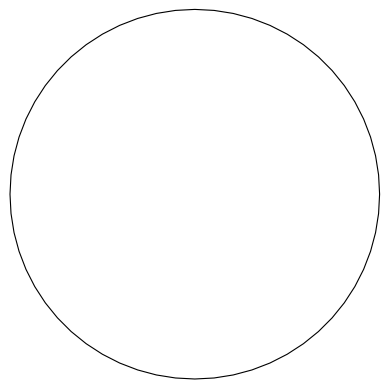

In [39]:
p = subset.LI.plot(
    x='lon', y='lat', 
    subplot_kws={'projection' : ccrs.Orthographic(-130, 40)},
    transform = ccrs.PlateCarree()
)
p.axes.add_feature(cfeature.COASTLINE)
p.axes.add_feature(cfeature.STATES)

In [5]:
import numpy as np

# designate dataset
g16nc = Dataset(g16_data_file, 'r')

# GOES-R projection info and retrieving relevant constants
proj_info = g16nc.variables['goes_imager_projection']
lon_origin = proj_info.longitude_of_projection_origin
H = proj_info.perspective_point_height+proj_info.semi_major_axis
r_eq = proj_info.semi_major_axis
r_pol = proj_info.semi_minor_axis

# Data info
lat_rad_1d = g16nc.variables['x'][:]
lon_rad_1d = g16nc.variables['y'][:]

# close file when finished
g16nc.close()
g16nc = None

# create meshgrid filled with radian angles
lat_rad,lon_rad = np.meshgrid(lat_rad_1d,lon_rad_1d)

# lat/lon calc routine from satellite radian angle vectors

lambda_0 = (lon_origin*np.pi)/180.0

a_var = np.power(np.sin(lat_rad),2.0) + (np.power(np.cos(lat_rad),2.0)*(np.power(np.cos(lon_rad),2.0)+(((r_eq*r_eq)/(r_pol*r_pol))*np.power(np.sin(lon_rad),2.0))))
b_var = -2.0*H*np.cos(lat_rad)*np.cos(lon_rad)
c_var = (H**2.0)-(r_eq**2.0)

r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)

s_x = r_s*np.cos(lat_rad)*np.cos(lon_rad)
s_y = - r_s*np.sin(lat_rad)
s_z = r_s*np.cos(lat_rad)*np.sin(lon_rad)

lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
lon = (lambda_0 - np.arctan(s_y/(H-s_x)))*(180.0/np.pi)


# print test coordinates
print('{} N, {} W'.format(lat[318,318],abs(lon[318,318])))

21.36838722229004 N, 97.91773986816406 W


/tmp/ipykernel_31727/1999400426.py:32: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)
/tmp/ipykernel_31727/1999400426.py:38: RuntimeWarning: invalid value encountered in sqrt
  lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))


# Visualizing GOES-R Data with The Derived Geographic Coordinate Grid Projection

In [5]:
from netCDF4 import Dataset
import matplotlib as mpl
mpl.use('Agg') # see: https://stackoverflow.com/questions/55811545/importerror-cannot-load-backend-tkagg-which-requires-the-tk-interactive-fra
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import os

def lat_lon_reproj(nc_folder,nc_indx):
    # os.chdir(nc_folder)
    full_direc = os.listdir(nc_folder)
    nc_files = [ii for ii in full_direc if ii.endswith('.nc')]
    g16_data_file = nc_files[nc_indx] # select .nc file
    print(nc_files[nc_indx]) # print file name

    # designate dataset
    g16nc = Dataset(nc_folder + g16_data_file, 'r')
    var_names = [ii for ii in g16nc.variables]
    var_name = var_names[0]
    try:
        band_id = g16nc.variables['band_id'][:]
        band_id = ' (Band: {},'.format(band_id[0])
        band_wavelength = g16nc.variables['band_wavelength']
        band_wavelength_units = band_wavelength.units
        band_wavelength_units = '{})'.format(band_wavelength_units)
        band_wavelength = ' {0:.2f} '.format(band_wavelength[:][0])
        print('Band ID: {}'.format(band_id))
        print('Band Wavelength: {} {}'.format(band_wavelength,band_wavelength_units))
    except:
        band_id = ''
        band_wavelength = ''
        band_wavelength_units = ''

    # GOES-R projection info and retrieving relevant constants
    proj_info = g16nc.variables['goes_imager_projection']
    lon_origin = proj_info.longitude_of_projection_origin
    H = proj_info.perspective_point_height+proj_info.semi_major_axis
    r_eq = proj_info.semi_major_axis
    r_pol = proj_info.semi_minor_axis

    # grid info
    lat_rad_1d = g16nc.variables['x'][:]
    lon_rad_1d = g16nc.variables['y'][:]

    # data info    
    data = g16nc.variables[var_name][:]
    data_units = g16nc.variables[var_name].units
    data_time_grab = ((g16nc.time_coverage_end).replace('T',' ')).replace('Z','')
    data_long_name = g16nc.variables[var_name].long_name
    
    # close file when finished
    g16nc.close()
    g16nc = None

    # create meshgrid filled with radian angles
    lat_rad,lon_rad = np.meshgrid(lat_rad_1d,lon_rad_1d)

    # lat/lon calc routine from satellite radian angle vectors

    lambda_0 = (lon_origin*np.pi)/180.0

    a_var = np.power(np.sin(lat_rad),2.0) + (np.power(np.cos(lat_rad),2.0)*(np.power(np.cos(lon_rad),2.0)+(((r_eq*r_eq)/(r_pol*r_pol))*np.power(np.sin(lon_rad),2.0))))
    b_var = -2.0*H*np.cos(lat_rad)*np.cos(lon_rad)
    c_var = (H**2.0)-(r_eq**2.0)

    r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)

    s_x = r_s*np.cos(lat_rad)*np.cos(lon_rad)
    s_y = - r_s*np.sin(lat_rad)
    s_z = r_s*np.cos(lat_rad)*np.sin(lon_rad)

    lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
    lon = (lambda_0 - np.arctan(s_y/(H-s_x)))*(180.0/np.pi)


    # print test coordinates
    print('{} N, {} W'.format(lat[318,318],abs(lon[318,318])))

    return lon,lat,data,data_units,data_time_grab,data_long_name,band_id,band_wavelength,band_wavelength_units,var_name

nc_folder = '../data/goes16/temp/' # define folder where .nc files are located

file_indx = 15 # be sure to pick the correct file. Make sure the file is not too big either,
# some of the bands create large files (stick to band 7-16)

# main data grab from function above
lon,lat,data,data_units,data_time_grab,data_long_name,band_id,band_wavelength,band_units,var_name = lat_lon_reproj(nc_folder,file_indx)

bbox = [np.min(lon),np.min(lat),np.max(lon),np.max(lat)] # set bounds for plotting
print(f'bbox: {bbox}')

# figure routine for visualization
fig = plt.figure(figsize=(9,4),dpi=200)

n_add = 0
m = Basemap(llcrnrlon=bbox[0]-n_add,llcrnrlat=bbox[1]-n_add,urcrnrlon=bbox[2]+n_add,urcrnrlat=bbox[3]+n_add,resolution='i', projection='cyl')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.25)
m.pcolormesh(lon.data, lat.data, data, latlon=True)
parallels = np.linspace(np.min(lat),np.max(lat),5.)
m.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.linspace(np.min(lon),np.max(lon),5.)
m.drawmeridians(meridians,labels=[False,False,False,True])
cb = m.colorbar()

data_units = ((data_units.replace('-','^{-')).replace('1','1}')).replace('2','2}')
plt.rc('text', usetex=True)
cb.set_label(r'%s $ \left[ \mathrm{%s} \right] $'% (var_name,data_units))
plt.title('{0}{2}{3}{4} on {1}'.format(data_long_name,data_time_grab,band_id,band_wavelength,band_units))
plt.tight_layout()

#plt.savefig('goes_16_demo.png',dpi=200,transparent=True) # uncomment to save figure
plt.show()

OR_ABI-L2-TPWF-M6_G16_s20240120000204_e20240120009512_c20240120011258.nc
21.36838722229004 N, 97.91773986816406 W
bbox: [-156.27083, -80.99853, 6.2708173, 80.99853]


/tmp/ipykernel_32178/2320723714.py:66: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)
/tmp/ipykernel_32178/2320723714.py:72: RuntimeWarning: invalid value encountered in sqrt
  lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
/tmp/ipykernel_32178/2320723714.py:99: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(lon.data, lat.data, data, latlon=True)


TypeError: 'float' object cannot be interpreted as an integer

# From GEMINI

In [43]:
import xarray as xr

def get_tsm_value(filename, lat, lon):
  """
  Extracts the TSM value from a netcdf file for a given latitude and longitude.

  Args:
      filename (str): Path to the netcdf file.
      lat (float): Latitude coordinate.
      lon (float): Longitude coordinate.

  Returns:
      float: The TSM value at the specified location, or None if not found.
  """
  # Open the netcdf file using xarray
  dataset = xr.open_dataset(filename)

  print(f'Available variables: {dataset.data_vars}')

  # Check if 'tsm' variable exists
  if 'CAPE' not in dataset.data_vars:
    raise ValueError(f"Variable 'tsm' not found in {filename}")

  # Select data closest to the desired coordinates using nearest neighbor interpolation
  tsm_data = dataset['CAPE'].sel(lon=lon, lat=lat, method='nearest')

  # Extract the value (assuming a single time dimension)
  try:
    tsm_value = tsm_data.values.item()
  except ValueError:
    # Handle cases where there's no data at the exact point (e.g., on land)
    return None

  # Close the dataset
  dataset.close()

  return tsm_value

# Example usage
filename = "../data/goes16/temp/OR_ABI-L2-DSIF-M6_G16_s20240690000204_e20240690009512_c20240690011060.nc"
lat = 40.5  # Replace with your desired latitude
lon = -74.0  # Replace with your desired longitude

tsm_value = get_tsm_value(filename, lat, lon)

if tsm_value is not None:
  print(f"TSM value at ({lat:.2f}, {lon:.2f}): {tsm_value}")
else:
  print(f"No TSM data found at ({lat:.2f}, {lon:.2f})")


Available variables: Data variables:
    LI                                                (y, x) float32 ...
    CAPE                                              (y, x) float32 ...
    TT                                                (y, x) float32 ...
    SI                                                (y, x) float32 ...
    KI                                                (y, x) float32 ...
    DQF_Overall                                       (y, x) float32 ...
    DQF_Retrieval                                     (y, x) float32 ...
    DQF_SkinTemp                                      (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    nominal_satellite_subpoint_lat  

KeyError: "'lon' is not a valid dimension or coordinate"

# Reprojecting GOES16 Satellite Data with Cartopy and Pyproj

https://stackoverflow.com/questions/51731597/reprojecting-goes16-satellite-data-with-cartopy-and-pyproj

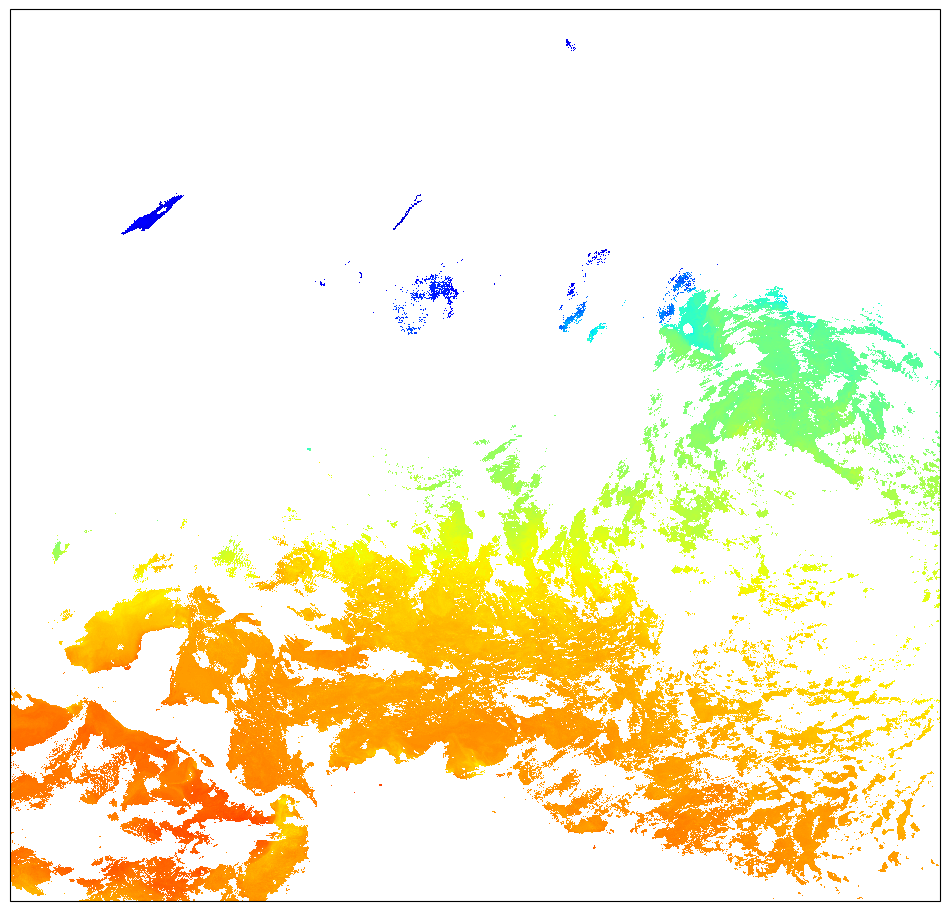

In [48]:
from datetime import datetime
import cartopy.feature as cfeature
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt
from matplotlib import patheffects
import metpy
from metpy.plots import colortables
import xarray as xr
from xarray.backends import NetCDF4DataStore

%matplotlib inline

nowdate = datetime.utcnow()
# cat = TDSCatalog('http://thredds-jumbo.unidata.ucar.edu/thredds/catalog/satellite/goes16/GOES16/Products/SeaSurfaceTemperature/FullDisk/' + \
#                   str(nowdate.year) + str("%02d"%nowdate.month) + str("%02d"%nowdate.day) + '/catalog.xml')
# dataset_name = sorted(cat.datasets.keys())[-1]
# dataset = cat.datasets[dataset_name]
# ds = dataset.remote_access(service='OPENDAP')
# ds = NetCDF4DataStore(ds)

ds = xr.open_dataset('../data/goes16/temp/OR_ABI-L2-SSTF-M6_G16_s20240690100204_e20240690159512_c20240690204417.nc')
# ds = xr.open_dataset(ds)


dqf = ds.metpy.parse_cf('DQF')
dat = ds.metpy.parse_cf('SST')
proj = dat.metpy.cartopy_crs

dat = dat.where(dqf == 0)
dat = dat.where(dat.variable > 274)
dat = dat.where(dat.variable < 310)
dat = dat - 273.15
# Plot in Mercator
import cartopy.crs as ccrs
newproj = ccrs.Mercator()


fig = plt.figure(figsize=[12, 12], dpi=100)
ax = fig.add_subplot(1,1,1, projection=newproj)
im = ax.pcolormesh(dat['x'], dat['y'], dat, cmap='jet', transform=proj, vmin=-2, vmax=38)
ax.set_extent((dat['x'].min() + 4000000, dat['x'].max()- 3200000, dat['y'].min()+ 5500000, dat['y'].max()- 650000), crs=proj)